# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We have the data for years 2019-2023 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2023.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [5]:
library('tidyverse')
library('readxl')



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [6]:
df_price_index = read_excel('revised-seasonally-adjusted-indexes-2023.xlsx')

df_price_index |> head()


ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.561,253.319,254.277,255.233,255.296,255.213,255.802,256.036,256.430,257.155,257.879,258.630
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.906,259.246,258.150,256.126,255.848,257.004,258.408,259.366,259.951,260.249,260.895,262.005
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2021,262.518,263.583,264.910,266.752,268.452,270.664,271.994,272.789,273.887,276.434,278.799,280.808
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2022,282.390,284.535,287.553,288.764,291.359,294.996,294.977,295.209,296.341,297.863,298.648,298.812
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2023,300.356,301.509,301.744,303.032,303.365,304.003,304.628,306.187,307.288,307.531,308.024,308.742
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2019,99.664,99.786,99.971,100.123,100.312,100.364,100.301,100.204,100.128,100.074,99.740,99.360


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for over the period covered in the dataset (2019-2023).

Execute this cell. You'll need this months vector for the picot operation below:

In [1]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Create a column for the date with this mutate operation: `mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d'))`
- Group by `date` and `summarize` by taking the mean value for each date group.


The first three rows of your table will look something like this:

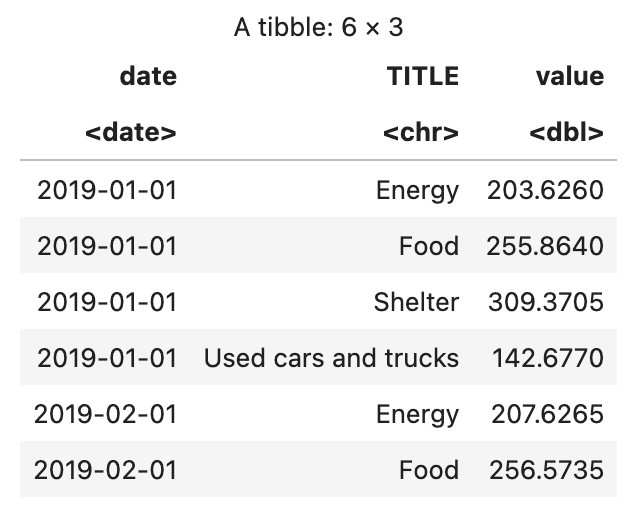

In [35]:
prices = df_price_index |> filter(TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks') & DATA_TYPE == 'SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols = months) |>
    mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d')) |>
    group_by(date, TITLE) |>
    summarize(avg = mean(value))
head(prices)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date,TITLE,avg
<date>,<chr>,<dbl>
2019-01-01,Energy,203.6260
2019-01-01,Food,255.8640
2019-01-01,Shelter,309.3705
2019-01-01,Used cars and trucks,142.6770
2019-02-01,Energy,207.6265
2019-02-01,Food,256.5735


Ok! Now make this plot:

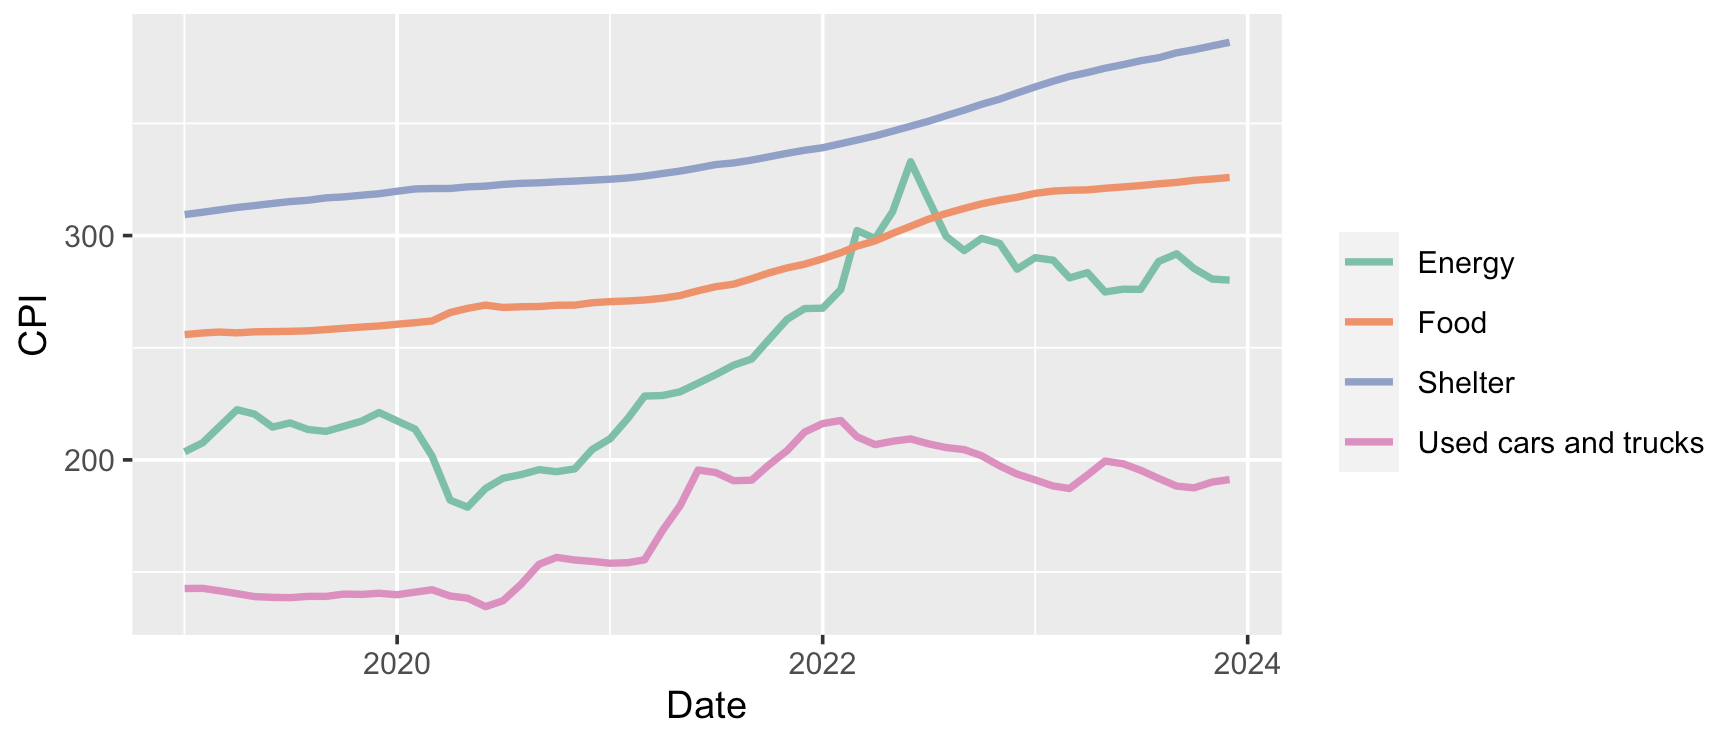

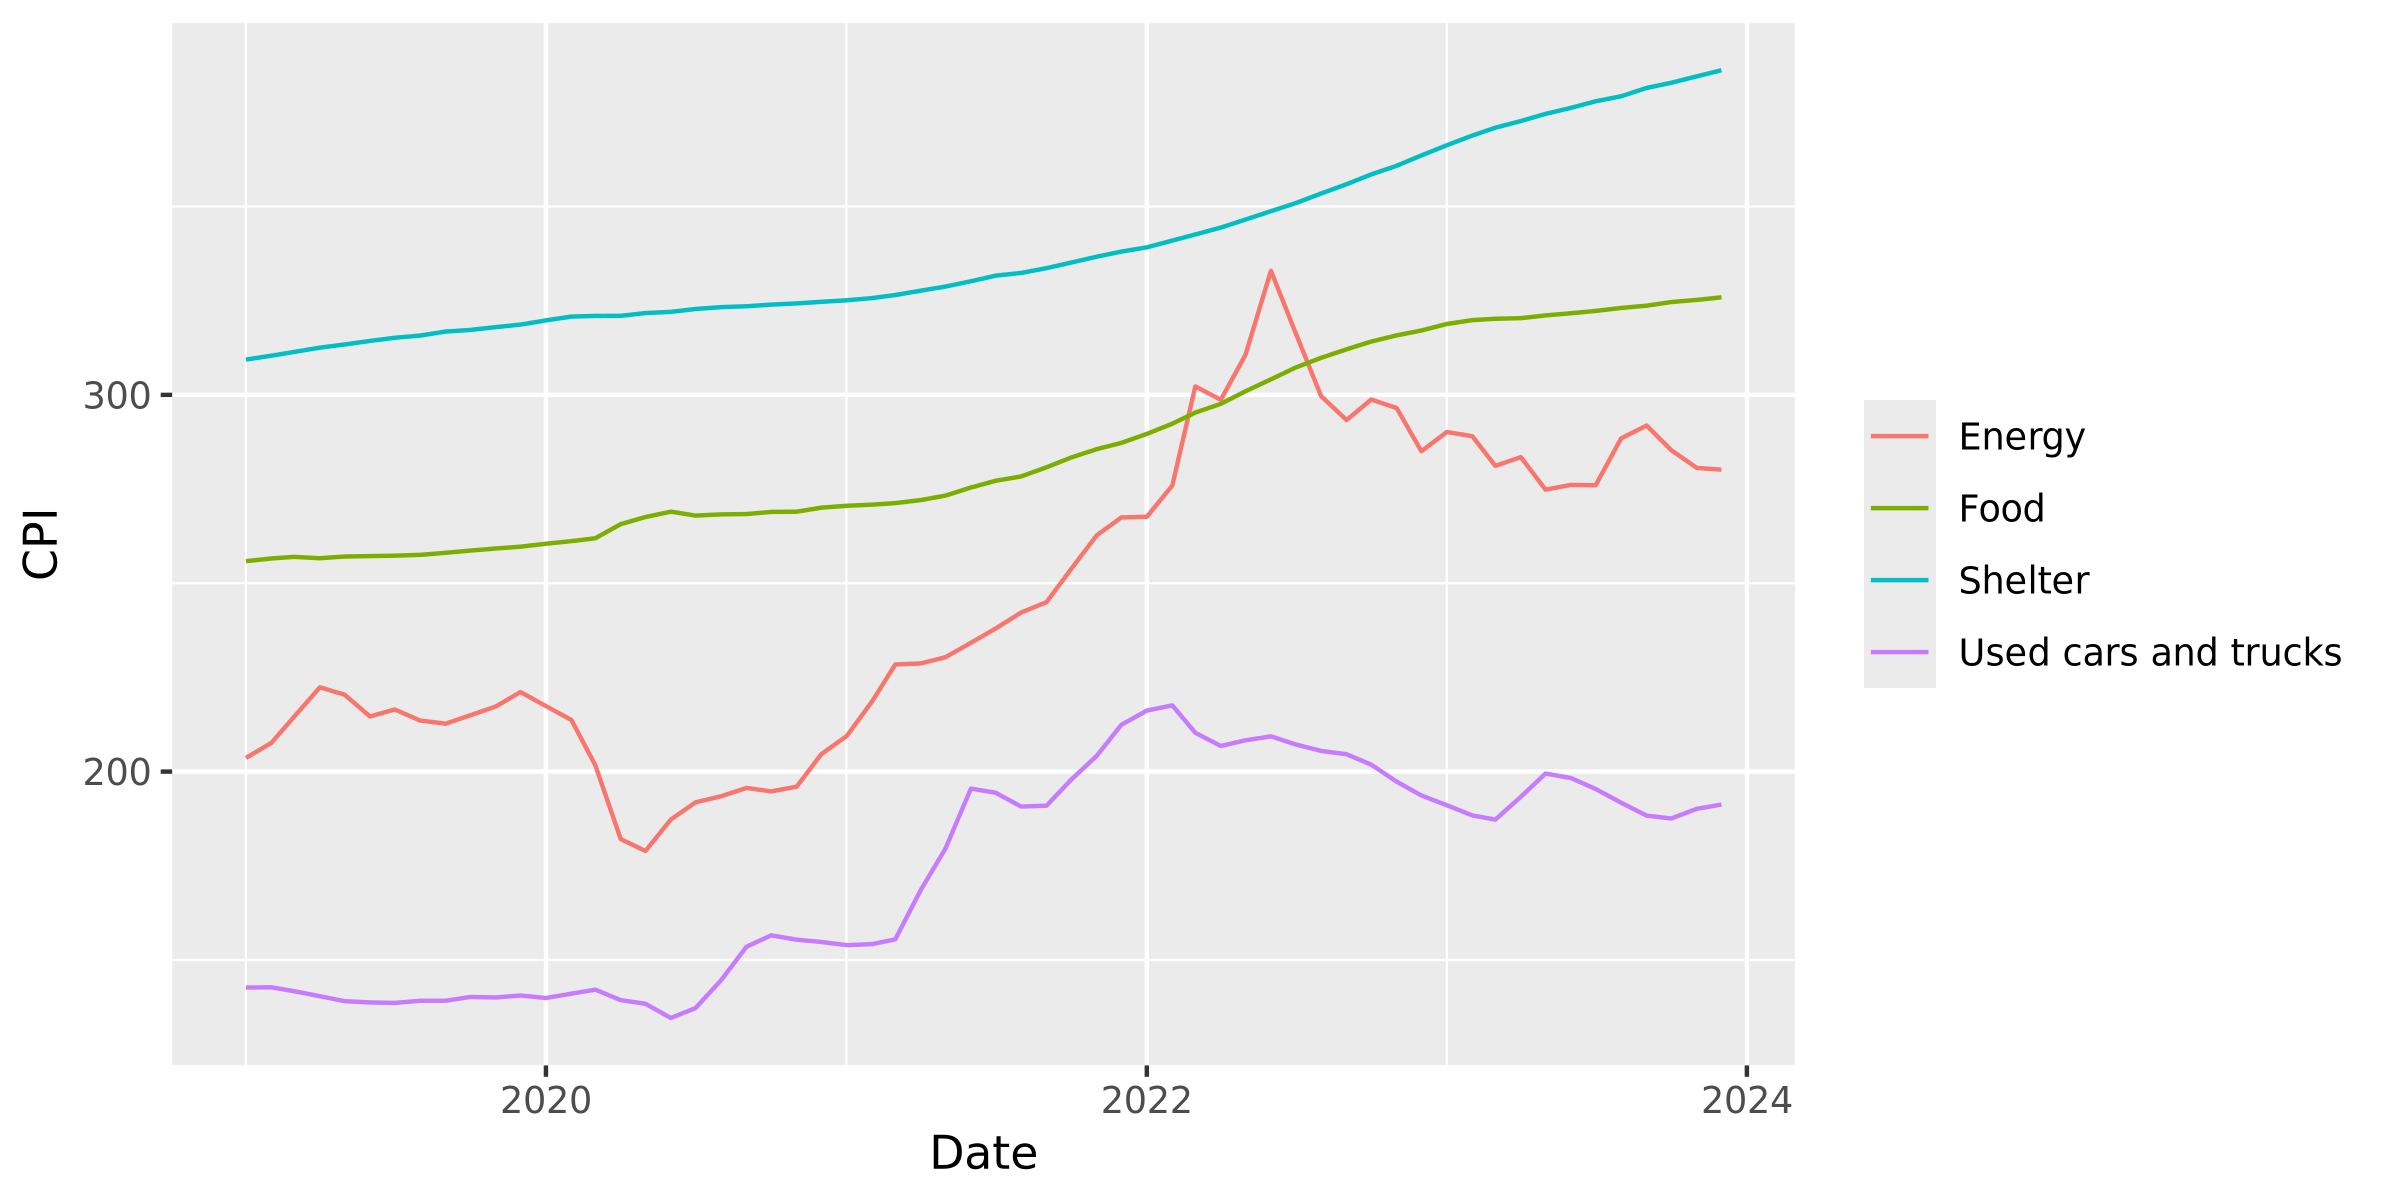

In [34]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 4)

p = ggplot(prices, aes(x = date, y = avg, color = TITLE)) + 
    geom_line() + 
    labs(x = "Date",y = "CPI", color = NULL) 

p

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.